In [1]:
import numpy as np
from importlib import reload
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import visualization
import timeit
import pickle
from numpy.random import multivariate_normal
from scipy.stats import multivariate_normal as mn
from sklearn.metrics import roc_curve, roc_auc_score
from scipy.sparse import csr_matrix
import topic_model
reload(topic_model)
from topic_model import TopicModel, BaseRegularizer, KLDocumentPairsRegularizer, KLWordPairsRegularizer

# 1. 
Реализовать ЕМ-алгоритм для восстановления параметров тематической модели PLSA с возможностью добавления регуляризации. Помните, что можно избежать хранения трёхмерного массива счётчиков при правильной организации процесса обучения.


# 2. 
Провести тестирование реализованного ЕМ-алгоритма на сгенерированных данных. Для этого необходимо сгенерировать столбцы Φ, Θ (например, из нормированного Гамма распределения) и по модели порождения коллекции сгенерировать коллекцию. Протестировать алгоритм на сгенерированных данных и убедиться, что правдоподобие не убывает на каждом шаге алгоритма.

In [332]:
dict_size = 100
T_number = 10
docs_number = 500

sintetic_phi = np.random.gamma(size=(dict_size, T_number), shape=2.)
sintetic_phi /= sintetic_phi.sum(axis=0)
sintetic_theta = np.random.gamma(size=(T_number, docs_number), shape=2.)
sintetic_theta /= sintetic_theta.sum(axis=0)

In [333]:
collection = np.empty((docs_number, dict_size))
for doc_number in range(docs_number):
    doc_length = np.random.randint(20, size=1, high=100, dtype=int)
    topic_distr = np.random.choice(T_number, p=sintetic_theta[:, doc_number], size=doc_length)
    word_counters = np.zeros(dict_size)
    for pos, topic in enumerate(topic_distr):
        #collection[doc_number, pos] = np.random.choice(dict_size, p=sintetic_phi[:, topic], size=1)
        word_counters[np.random.choice(dict_size, p=sintetic_phi[:, topic], size=1)] += 1
    collection[doc_number] = word_counters
collection = csr_matrix(collection)

In [338]:
reload(topic_model)
from topic_model import TopicModel, BaseRegularizer, KLDocumentPairsRegularizer, KLWordPairsRegularizer

In [339]:
model_2 = TopicModel(num_topics=10)

In [340]:
logs_2 = model_2.EM_fit(data=collection, trace=True)[-1]

0 time: 0.01413332496304065
1 time: 0.014989605988375843
2 time: 0.009234919969458133
3 time: 0.010843687981832772
4 time: 0.009174513979814947
5 time: 0.009168396994937211
6 time: 0.009988881996832788
7 time: 0.008825652010273188
8 time: 0.00979195802938193
9 time: 0.012208150990772992
10 time: 0.017087632964830846
11 time: 0.00962691503809765
12 time: 0.007878143980633467
13 time: 0.011409560975153
14 time: 0.007225907989777625
15 time: 0.007487987983040512
16 time: 0.007347359962295741
17 time: 0.0075827090186066926
18 time: 0.007209294999483973
19 time: 0.007308694010134786
20 time: 0.007460168970283121
21 time: 0.01079582900274545
22 time: 0.01142839400563389
23 time: 0.010485787002835423
24 time: 0.009652888984419405
25 time: 0.00743487203726545
26 time: 0.00759912800276652
27 time: 0.0073207709938287735
28 time: 0.007371589948888868
29 time: 0.00869229796808213


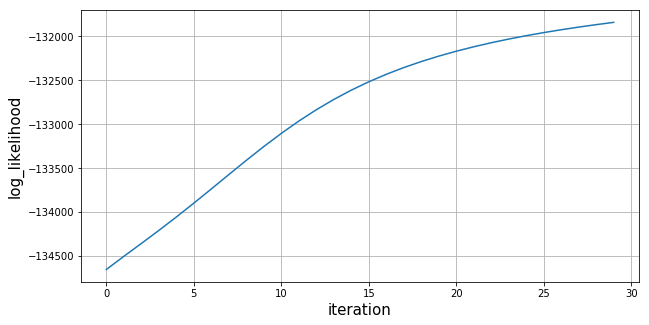

In [344]:
fig, ax = plt.subplots()

fig.set_figwidth(10)
fig.set_figheight(5)


plt.plot(range(len(logs_2)), logs_2)


plt.grid(True)
plt.ylabel('log_likelihood', fontsize=15)
plt.xlabel('iteration', fontsize=15)
fig.savefig('exp2_2.pdf', bbox_inches='tight')

# 3. 
Считать обучающую выборку, сохранить датасет в памяти в формате scipy.sparse.csr_matrix.
Замечание. Для текстов проведена полная предобработка (лемматизация, выброшены стоп-слова, удале- ны лишние символы). Можно удалить из выборки слова, которые встречаются меньше чем в 5 документах, для снижения времени работы.



In [2]:
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
cv = CountVectorizer(min_df=10)

In [4]:
english_data = []
with open('data_news_parallel/english_clean', 'r') as f:
    for line in f:
        english_data.append(line)
        
russian_data = []
with open('data_news_parallel/russian_clean', 'r') as f:
    for line in f:
        russian_data.append(line)
 

In [5]:
english_full = []
with open('data_news_parallel/english_full', 'r') as f:
    for line in f:
        english_full.append(line)
        
russian_full = []
with open('data_news_parallel/russian_full', 'r') as f:
    for line in f:
        russian_full.append(line)



In [6]:
english_train = cv.fit_transform(english_data[:int(0.5 * len(english_data))])
english_words = cv.vocabulary_

russian_train = cv.fit_transform(russian_data[:int(0.5 * len(russian_data))])
russian_words = cv.vocabulary_

# 4. 
Построить модель на русскоязычной или англоязычной части коллекции (около 50 тем), для каждой темы вывести список её топ-слов и топ-документов. Визуально оценить интерпретируемость полученных тем.



In [358]:
reload(topic_model)
from topic_model import TopicModel, BaseRegularizer, KLDocumentPairsRegularizer, KLWordPairsRegularizer

In [359]:
model_4 = TopicModel(num_topics=50)

In [360]:
russian_train_4 = cv.fit_transform(russian_data[:int(0.9 * len(russian_data))])
russian_words_4 = list(cv.vocabulary_.keys())
russian_words_4.sort()
cv_rus = CountVectorizer(vocabulary=russian_words_4)
russian_train_4 = cv_rus.transform(russian_data[:int(0.9 * len(russian_data))])

In [ ]:
start_time = timeit.default_timer()
phi_4, theta_4, logs_4 = model_4.EM_fit(data=russian_train_4, 
                                trace=True, 
                                vocab=russian_words_4, 
                                document_names=russian_full[:int(0.9 * len(russian_data))])
print('time:', timeit.default_timer() - start_time)

0 time: 45.5455030699959
1 time: 40.8515224349685
2 time: 39.509302427002694
3 time: 39.43901215202641
4 time: 42.4055253409897
5 time: 47.450367584999185


In [117]:
with open('2_exp_4_logs_phi_theta_n_wt_n_td.pickle', 'wb') as f:
    tmp = (logs_4, model_4.Phi, model_4.Theta, model_4._nwt, model_4._ntd)
    pickle.dump(tmp, f)


In [118]:
with open('2_exp_4_logs_phi_theta_n_wt_n_td.pickle', 'rb') as f:
    logs_4, model_4.Phi, model_4.Theta, model_4._nwt, model_4._ntd = pickle.load(f)

In [107]:
model_4.vocab=russian_words_4
model_4.document_names=russian_full[:int(0.9 * len(russian_data))]

In [119]:
top_words_4 = model_4.get_top_words(20)

In [125]:
top_words_4[7]

['ребенок',
 'здравоохранение',
 'население',
 'миллион',
 'сельский',
 'страна',
 'фермер',
 'жизнь',
 'медицинский',
 'уровень',
 'бедный',
 'питание',
 'здоровье',
 'лекарство',
 'заболевание',
 'продукт',
 'болезнь',
 'проблема',
 'хозяйство',
 'высокий']

In [122]:
top_docs_4 = model_4.get_top_docs(5)

In [126]:
top_docs_4[7]

['Опасные мифы о раковых заболеваниях ЖЕНЕВА – В этом году Всемирный день борьбы с раком будет посвящен в первую очередь тому, чтобы развеять вредоносные мифы об этой болезни. Тема – иллюстрируемая слоганом «Рак ‑ а вы об этом знали?» ‑ предлагает возможность поразмышлять об истинных последствиях рака и укрепить усилия по его профилактике и лечению во всем мире. Один из бытующих мифов гласит, что рак в первую очередь является проблемой развитых стран. И хотя это правда, что рак является широко распространенным заболеванием в богатых странах, люди в беднейших странах теряют из-за него множество лет своей жизни. В то время как медицинские достижения и технологические разработки помогли больным раком в странах с высоким уровнем дохода жить дольше – до такой степени, что некоторые формы рака фактически стали хроническими заболеваниями – те же больные в странах с низкими доходами по-прежнему умирают молодыми. Это не только несправедливо, но и глубоко трагично. После победы над такими убийца

# 5. 
Построить двуязычную регуляризованную модель с регуляризатором на основе данных о переводах слов. Предварительно выведите формулу для производных регуляризатора. Профильтруйте приложенные сло- вари, чтобы в них остались только слова, находящиеся в выборке. Подберите коэффициент регуляризации, основываясь на правдоподобии и метриках AP@n. Визуально оцените качество полученных тем. Сделайте необходимые выводы о применимости такого подхода.



# Подготовим данные

In [8]:
len(english_data), len(russian_data)

(4952, 4952)

In [9]:
multilingual_data = english_data[:int(0.5 * len(english_data))] + russian_data[:int(0.5 * len(russian_data))]
 

In [10]:
multilingual_data_test = english_data[int(0.5 * len(english_data)):] + russian_data[int(0.5 * len(russian_data)):]

In [11]:
multilingual_full = english_full[:int(0.5 * len(english_data))] + russian_full[:int(0.5 * len(russian_data))]

In [12]:
multilingual_full_test = english_full[int(0.5 * len(english_data)):] + russian_full[int(0.5 * len(russian_data)):]

In [13]:
multilingual_vocabulary = {'aaa'} 
multilingual_vocabulary = list(multilingual_vocabulary.union(set(english_words.keys()), set(russian_words.keys())))


In [14]:
multilingual_vocabulary.sort()


In [15]:
with_indices = dict(zip(multilingual_vocabulary, range(len(multilingual_vocabulary))))

In [16]:
word_pairs = {}
with open('data_news_parallel/dictionary_en_ru', 'r') as f:
    for line in f:
        split_string = line.split()
        eng_word = split_string[0]
        pos_translations = split_string[2:]
        if not (eng_word in english_words.keys()):
            continue
        translations = []
        for tr in pos_translations:
            if not (tr in russian_words.keys()):
                continue
            translations.append(with_indices[tr])
        if len(translations) != 0:
            word_pairs[with_indices[eng_word]] = translations
with open('data_news_parallel/dictionary_ru_en', 'r') as f:
    for line in f:
        split_string = line.split()
        rus_word = split_string[0]
        pos_translations = split_string[2:]
        if not (rus_word in russian_words.keys()):
            continue
         
        translations = []
        for tr in pos_translations:
            if not (tr in english_words.keys()):
                continue
            translations.append(with_indices[tr])
        if len(translations) != 0:
            word_pairs[with_indices[rus_word]] = translations
         

In [17]:
cv_mult = CountVectorizer(vocabulary=multilingual_vocabulary)

In [18]:
multilingual_train = cv_mult.transform(multilingual_data)

In [19]:
reload(topic_model)
from topic_model import TopicModel, BaseRegularizer, KLDocumentPairsRegularizer, KLWordPairsRegularizer

In [26]:
multilingual_test = cv_mult.transform(multilingual_data_test)

# Подберем коэффициент регуляризации

## tau = 1.0

In [20]:
kl_word_reg = KLWordPairsRegularizer(tau=1.0, word_pairs=word_pairs)

model_5_1 = TopicModel(num_topics=50, regularizers=[kl_word_reg])

In [21]:
start_time = timeit.default_timer()
phi_5_1, theta_5_1, logs_5_1 = model_5_1.EM_fit(data=multilingual_train, 
                                trace=True, 
                                vocab=multilingual_vocabulary, 
                                document_names=multilingual_full)
print('time:', timeit.default_timer() - start_time)

0 time: 102.92103589797625
1 time: 147.6999664310133
2 time: 149.31754837895278
3 time: 150.82976956199855
4 time: 144.51250215404434
5 time: 137.43103069998324
6 time: 141.8309347720351
7 time: 139.82013628300047
8 time: 146.13773156999378
9 time: 138.83267860795604
10 time: 134.0450920209987
11 time: 123.21416173700709
12 time: 133.12497597397305
13 time: 145.75055637204787
14 time: 140.45478057302535
15 time: 133.69630547898123
16 time: 147.56620277499314
17 time: 137.299332089955
18 time: 136.80396544199903
19 time: 148.27587025501998
20 time: 152.21442543703597
21 time: 149.56184000096982
22 time: 153.12910332198953
23 time: 144.32142985798419
24 time: 149.37643518904224
25 time: 143.1077783969813
26 time: 136.3867342589656
27 time: 136.84577078098664
28 time: 137.83707887801575
29 time: 141.07865953398868
time: 4223.576952347008


In [22]:
#with open('2_exp_5_logs_phi_theta_n_wt_n_td_tau=1.0.pickle', 'wb') as f:
    #tmp = (logs_5_1, model_5_1.Phi, model_5_1.Theta, model_5_1._nwt, model_5_1._ntd)
    #pickle.dump(tmp, f)

#######read 

#with open('2_exp_5_logs_phi_theta_n_wt_n_td_1.0.pickle', 'rb') as f:
    #logs_5, model_5.Phi, model_5.Theta, model_5._nwt, model_5._ntd = pickle.load(f)


## tau = 10.0

In [29]:
kl_word_reg = KLWordPairsRegularizer(tau=10.0, word_pairs=word_pairs)

model_5_10 = TopicModel(num_topics=50, regularizers=[kl_word_reg])

In [295]:
start_time = timeit.default_timer()
phi_5_10, theta_5_10, logs_5_10 = model_5_10.EM_fit(data=multilingual_train, 
                                trace=True, 
                                vocab=multilingual_vocabulary, 
                                document_names=multilingual_full)
print('time:', timeit.default_timer() - start_time)

[['world', 'китай', 'рост', 'правительство', 'политический', 'policy', 'economic', 'государство', 'европа', 'market'], ['финансовый', 'правительство', 'global', 'world', 'большой', 'european', 'рынок', 'система', 'политика', 'market'], ['government', 'policy', 'экономический', 'global', 'экономика', 'financial', 'финансовый', 'economic', 'war', 'правительство'], ['world', 'новый', 'china', 'проблема', 'китай', 'political', 'экономика', 'большой', 'time', 'economic'], ['экономический', 'правительство', 'europe', 'global', 'европа', 'рынок', 'china', 'political', 'war', 'crisis'], ['government', 'финансовый', 'economic', 'сша', 'новый', 'политика', 'вопрос', 'european', 'political', 'china'], ['китай', 'world', 'политика', 'europe', 'рост', 'правительство', 'china', 'финансовый', 'экономика', 'политический'], ['экономический', 'world', 'китай', 'рост', 'europe', 'economic', 'политический', 'market', 'сша', 'financial'], ['экономический', 'china', 'government', 'рост', 'правительство', 'п

1 time: 29.54038872901583
[['world', 'китай', 'рост', 'правительство', 'политический', 'policy', 'economic', 'государство', 'европа', 'market'], ['финансовый', 'правительство', 'global', 'world', 'большой', 'рынок', 'система', 'european', 'политика', 'market'], ['government', 'policy', 'global', 'financial', 'экономика', 'экономический', 'war', 'economic', 'interest', 'финансовый'], ['world', 'новый', 'china', 'проблема', 'political', 'китай', 'экономика', 'большой', 'time', 'economic'], ['экономический', 'правительство', 'europe', 'европа', 'global', 'рынок', 'war', 'political', 'china', 'crisis'], ['government', 'финансовый', 'economic', 'новый', 'сша', 'политика', 'вопрос', 'european', 'people', 'political'], ['китай', 'world', 'политика', 'europe', 'china', 'рост', 'правительство', 'экономика', 'политический', 'финансовый'], ['экономический', 'world', 'китай', 'рост', 'europe', 'economic', 'политический', 'market', 'сша', 'political'], ['экономический', 'china', 'government', 'рост

3 time: 24.984361322945915
[['world', 'китай', 'рост', 'политический', 'правительство', 'государство', 'policy', 'market', 'европа', 'economic'], ['финансовый', 'global', 'правительство', 'рынок', 'world', 'большой', 'система', 'european', 'политика', 'цена'], ['government', 'policy', 'global', 'financial', 'war', 'interest', 'economic', 'american', 'president', 'rate'], ['world', 'новый', 'china', 'проблема', 'political', 'китай', 'большой', 'экономика', 'economic', 'time'], ['экономический', 'правительство', 'европа', 'europe', 'рынок', 'global', 'war', 'political', 'международный', 'вопрос'], ['government', 'финансовый', 'новый', 'сша', 'economic', 'политика', 'вопрос', 'отношение', 'people', 'political'], ['китай', 'world', 'политика', 'europe', 'china', 'power', 'политический', 'правительство', 'экономика', 'рост'], ['экономический', 'китай', 'world', 'рост', 'europe', 'economic', 'политический', 'market', 'political', 'сша'], ['china', 'government', 'экономический', 'political', 

5 time: 24.797134588996414
[['политический', 'китай', 'рост', 'правительство', 'государство', 'world', 'президент', 'америка', 'европа', 'война'], ['финансовый', 'global', 'рынок', 'система', 'правительство', 'цена', 'world', 'большой', 'рост', 'economy'], ['government', 'policy', 'financial', 'global', 'interest', 'american', 'rate', 'economic', 'war', 'president'], ['новый', 'проблема', 'большой', 'political', 'китай', 'экономика', 'world', 'правительство', 'глобальный', 'china'], ['экономический', 'европа', 'правительство', 'рынок', 'европейский', 'вопрос', 'международный', 'власть', 'europe', 'многий'], ['новый', 'сша', 'финансовый', 'политика', 'вопрос', 'отношение', 'америка', 'government', 'получать', 'правительство'], ['китай', 'world', 'power', 'china', 'политика', 'international', 'europe', 'политический', 'leader', 'political'], ['экономический', 'китай', 'рост', 'world', 'europe', 'политический', 'economic', 'political', 'система', 'сша'], ['china', 'government', 'debt', 'p

7 time: 24.883191676985007


KeyboardInterrupt: 

In [31]:
#with open('2_exp_5_logs_phi_theta_n_wt_n_td_tau=10.0.pickle', 'wb') as f:
    #tmp = (logs_5_10, model_5_10.Phi, model_5_10.Theta, model_5_10._nwt, model_5_10._ntd)
    #pickle.dump(tmp, f)

#######read 

with open('2_exp_5_logs_phi_theta_n_wt_n_td_tau=10.0.pickle', 'rb') as f:
    logs_5_10, model_5_10.Phi, model_5_10.Theta, model_5_10._nwt, model_5_10._ntd = pickle.load(f)

model_5_10.vocab=multilingual_vocabulary
model_5_10.document_names=multilingual_full

## tau = 50.0

In [32]:
kl_word_reg = KLWordPairsRegularizer(tau=50.0, word_pairs=word_pairs)

model_5_50 = TopicModel(num_topics=50, regularizers=[kl_word_reg])

In [295]:
start_time = timeit.default_timer()
phi_5_50, theta_5_50, logs_5_50 = model_5_50.EM_fit(data=multilingual_train, 
                                trace=True, 
                                vocab=multilingual_vocabulary, 
                                document_names=multilingual_full)
print('time:', timeit.default_timer() - start_time)

[['world', 'китай', 'рост', 'правительство', 'политический', 'policy', 'economic', 'государство', 'европа', 'market'], ['финансовый', 'правительство', 'global', 'world', 'большой', 'european', 'рынок', 'система', 'политика', 'market'], ['government', 'policy', 'экономический', 'global', 'экономика', 'financial', 'финансовый', 'economic', 'war', 'правительство'], ['world', 'новый', 'china', 'проблема', 'китай', 'political', 'экономика', 'большой', 'time', 'economic'], ['экономический', 'правительство', 'europe', 'global', 'европа', 'рынок', 'china', 'political', 'war', 'crisis'], ['government', 'финансовый', 'economic', 'сша', 'новый', 'политика', 'вопрос', 'european', 'political', 'china'], ['китай', 'world', 'политика', 'europe', 'рост', 'правительство', 'china', 'финансовый', 'экономика', 'политический'], ['экономический', 'world', 'китай', 'рост', 'europe', 'economic', 'политический', 'market', 'сша', 'financial'], ['экономический', 'china', 'government', 'рост', 'правительство', 'п

1 time: 29.54038872901583
[['world', 'китай', 'рост', 'правительство', 'политический', 'policy', 'economic', 'государство', 'европа', 'market'], ['финансовый', 'правительство', 'global', 'world', 'большой', 'рынок', 'система', 'european', 'политика', 'market'], ['government', 'policy', 'global', 'financial', 'экономика', 'экономический', 'war', 'economic', 'interest', 'финансовый'], ['world', 'новый', 'china', 'проблема', 'political', 'китай', 'экономика', 'большой', 'time', 'economic'], ['экономический', 'правительство', 'europe', 'европа', 'global', 'рынок', 'war', 'political', 'china', 'crisis'], ['government', 'финансовый', 'economic', 'новый', 'сша', 'политика', 'вопрос', 'european', 'people', 'political'], ['китай', 'world', 'политика', 'europe', 'china', 'рост', 'правительство', 'экономика', 'политический', 'финансовый'], ['экономический', 'world', 'китай', 'рост', 'europe', 'economic', 'политический', 'market', 'сша', 'political'], ['экономический', 'china', 'government', 'рост

3 time: 24.984361322945915
[['world', 'китай', 'рост', 'политический', 'правительство', 'государство', 'policy', 'market', 'европа', 'economic'], ['финансовый', 'global', 'правительство', 'рынок', 'world', 'большой', 'система', 'european', 'политика', 'цена'], ['government', 'policy', 'global', 'financial', 'war', 'interest', 'economic', 'american', 'president', 'rate'], ['world', 'новый', 'china', 'проблема', 'political', 'китай', 'большой', 'экономика', 'economic', 'time'], ['экономический', 'правительство', 'европа', 'europe', 'рынок', 'global', 'war', 'political', 'международный', 'вопрос'], ['government', 'финансовый', 'новый', 'сша', 'economic', 'политика', 'вопрос', 'отношение', 'people', 'political'], ['китай', 'world', 'политика', 'europe', 'china', 'power', 'политический', 'правительство', 'экономика', 'рост'], ['экономический', 'китай', 'world', 'рост', 'europe', 'economic', 'политический', 'market', 'political', 'сша'], ['china', 'government', 'экономический', 'political', 

5 time: 24.797134588996414
[['политический', 'китай', 'рост', 'правительство', 'государство', 'world', 'президент', 'америка', 'европа', 'война'], ['финансовый', 'global', 'рынок', 'система', 'правительство', 'цена', 'world', 'большой', 'рост', 'economy'], ['government', 'policy', 'financial', 'global', 'interest', 'american', 'rate', 'economic', 'war', 'president'], ['новый', 'проблема', 'большой', 'political', 'китай', 'экономика', 'world', 'правительство', 'глобальный', 'china'], ['экономический', 'европа', 'правительство', 'рынок', 'европейский', 'вопрос', 'международный', 'власть', 'europe', 'многий'], ['новый', 'сша', 'финансовый', 'политика', 'вопрос', 'отношение', 'америка', 'government', 'получать', 'правительство'], ['китай', 'world', 'power', 'china', 'политика', 'international', 'europe', 'политический', 'leader', 'political'], ['экономический', 'китай', 'рост', 'world', 'europe', 'политический', 'economic', 'political', 'система', 'сша'], ['china', 'government', 'debt', 'p

7 time: 24.883191676985007


KeyboardInterrupt: 

In [33]:
#with open('2_exp_5_logs_phi_theta_n_wt_n_td_tau=50.0.pickle', 'wb') as f:
    #tmp = (logs_5_50, model_5_50.Phi, model_5_50.Theta, model_5_50._nwt, model_5_50._ntd)
    #pickle.dump(tmp, f)

#######read 

with open('2_exp_5_logs_phi_theta_n_wt_n_td_tau=50.0.pickle', 'rb') as f:
    logs_5_50, model_5_50.Phi, model_5_50.Theta, model_5_50._nwt, model_5_50._ntd = pickle.load(f)

model_5_50.vocab=multilingual_vocabulary
model_5_50.document_names=multilingual_full

## tau = 100.0

In [34]:
kl_word_reg = KLWordPairsRegularizer(tau=100.0, word_pairs=word_pairs)

model_5_100 = TopicModel(num_topics=50, regularizers=[kl_word_reg])

In [295]:
start_time = timeit.default_timer()
phi_5_100, theta_5_100, logs_5_100 = model_5_100.EM_fit(data=multilingual_train, 
                                trace=True, 
                                vocab=multilingual_vocabulary, 
                                document_names=multilingual_full)
print('time:', timeit.default_timer() - start_time)

[['world', 'китай', 'рост', 'правительство', 'политический', 'policy', 'economic', 'государство', 'европа', 'market'], ['финансовый', 'правительство', 'global', 'world', 'большой', 'european', 'рынок', 'система', 'политика', 'market'], ['government', 'policy', 'экономический', 'global', 'экономика', 'financial', 'финансовый', 'economic', 'war', 'правительство'], ['world', 'новый', 'china', 'проблема', 'китай', 'political', 'экономика', 'большой', 'time', 'economic'], ['экономический', 'правительство', 'europe', 'global', 'европа', 'рынок', 'china', 'political', 'war', 'crisis'], ['government', 'финансовый', 'economic', 'сша', 'новый', 'политика', 'вопрос', 'european', 'political', 'china'], ['китай', 'world', 'политика', 'europe', 'рост', 'правительство', 'china', 'финансовый', 'экономика', 'политический'], ['экономический', 'world', 'китай', 'рост', 'europe', 'economic', 'политический', 'market', 'сша', 'financial'], ['экономический', 'china', 'government', 'рост', 'правительство', 'п

1 time: 29.54038872901583
[['world', 'китай', 'рост', 'правительство', 'политический', 'policy', 'economic', 'государство', 'европа', 'market'], ['финансовый', 'правительство', 'global', 'world', 'большой', 'рынок', 'система', 'european', 'политика', 'market'], ['government', 'policy', 'global', 'financial', 'экономика', 'экономический', 'war', 'economic', 'interest', 'финансовый'], ['world', 'новый', 'china', 'проблема', 'political', 'китай', 'экономика', 'большой', 'time', 'economic'], ['экономический', 'правительство', 'europe', 'европа', 'global', 'рынок', 'war', 'political', 'china', 'crisis'], ['government', 'финансовый', 'economic', 'новый', 'сша', 'политика', 'вопрос', 'european', 'people', 'political'], ['китай', 'world', 'политика', 'europe', 'china', 'рост', 'правительство', 'экономика', 'политический', 'финансовый'], ['экономический', 'world', 'китай', 'рост', 'europe', 'economic', 'политический', 'market', 'сша', 'political'], ['экономический', 'china', 'government', 'рост

3 time: 24.984361322945915
[['world', 'китай', 'рост', 'политический', 'правительство', 'государство', 'policy', 'market', 'европа', 'economic'], ['финансовый', 'global', 'правительство', 'рынок', 'world', 'большой', 'система', 'european', 'политика', 'цена'], ['government', 'policy', 'global', 'financial', 'war', 'interest', 'economic', 'american', 'president', 'rate'], ['world', 'новый', 'china', 'проблема', 'political', 'китай', 'большой', 'экономика', 'economic', 'time'], ['экономический', 'правительство', 'европа', 'europe', 'рынок', 'global', 'war', 'political', 'международный', 'вопрос'], ['government', 'финансовый', 'новый', 'сша', 'economic', 'политика', 'вопрос', 'отношение', 'people', 'political'], ['китай', 'world', 'политика', 'europe', 'china', 'power', 'политический', 'правительство', 'экономика', 'рост'], ['экономический', 'китай', 'world', 'рост', 'europe', 'economic', 'политический', 'market', 'political', 'сша'], ['china', 'government', 'экономический', 'political', 

5 time: 24.797134588996414
[['политический', 'китай', 'рост', 'правительство', 'государство', 'world', 'президент', 'америка', 'европа', 'война'], ['финансовый', 'global', 'рынок', 'система', 'правительство', 'цена', 'world', 'большой', 'рост', 'economy'], ['government', 'policy', 'financial', 'global', 'interest', 'american', 'rate', 'economic', 'war', 'president'], ['новый', 'проблема', 'большой', 'political', 'китай', 'экономика', 'world', 'правительство', 'глобальный', 'china'], ['экономический', 'европа', 'правительство', 'рынок', 'европейский', 'вопрос', 'международный', 'власть', 'europe', 'многий'], ['новый', 'сша', 'финансовый', 'политика', 'вопрос', 'отношение', 'америка', 'government', 'получать', 'правительство'], ['китай', 'world', 'power', 'china', 'политика', 'international', 'europe', 'политический', 'leader', 'political'], ['экономический', 'китай', 'рост', 'world', 'europe', 'политический', 'economic', 'political', 'система', 'сша'], ['china', 'government', 'debt', 'p

7 time: 24.883191676985007


KeyboardInterrupt: 

In [35]:
#with open('2_exp_5_logs_phi_theta_n_wt_n_td_tau=100.0.pickle', 'wb') as f:
    #tmp = (logs_5_100, model_5_100.Phi, model_5_100.Theta, model_5_100._nwt, model_5_100._ntd)
    #pickle.dump(tmp, f)

#######read 

with open('2_exp_5_logs_phi_theta_n_wt_n_td_tau=100.0.pickle', 'rb') as f:
    logs_5_100, model_5_100.Phi, model_5_100.Theta, model_5_100._nwt, model_5_100._ntd = pickle.load(f)

model_5_100.vocab=multilingual_vocabulary
model_5_100.document_names=multilingual_full

## tau = 500.0

In [36]:
kl_word_reg = KLWordPairsRegularizer(tau=500.0, word_pairs=word_pairs)

model_5_500 = TopicModel(num_topics=50, regularizers=[kl_word_reg])

In [295]:
start_time = timeit.default_timer()
phi_5_500, theta_5_500, logs_5_500 = model_5_500.EM_fit(data=multilingual_train, 
                                trace=True, 
                                vocab=multilingual_vocabulary, 
                                document_names=multilingual_full)
print('time:', timeit.default_timer() - start_time)

[['world', 'китай', 'рост', 'правительство', 'политический', 'policy', 'economic', 'государство', 'европа', 'market'], ['финансовый', 'правительство', 'global', 'world', 'большой', 'european', 'рынок', 'система', 'политика', 'market'], ['government', 'policy', 'экономический', 'global', 'экономика', 'financial', 'финансовый', 'economic', 'war', 'правительство'], ['world', 'новый', 'china', 'проблема', 'китай', 'political', 'экономика', 'большой', 'time', 'economic'], ['экономический', 'правительство', 'europe', 'global', 'европа', 'рынок', 'china', 'political', 'war', 'crisis'], ['government', 'финансовый', 'economic', 'сша', 'новый', 'политика', 'вопрос', 'european', 'political', 'china'], ['китай', 'world', 'политика', 'europe', 'рост', 'правительство', 'china', 'финансовый', 'экономика', 'политический'], ['экономический', 'world', 'китай', 'рост', 'europe', 'economic', 'политический', 'market', 'сша', 'financial'], ['экономический', 'china', 'government', 'рост', 'правительство', 'п

1 time: 29.54038872901583
[['world', 'китай', 'рост', 'правительство', 'политический', 'policy', 'economic', 'государство', 'европа', 'market'], ['финансовый', 'правительство', 'global', 'world', 'большой', 'рынок', 'система', 'european', 'политика', 'market'], ['government', 'policy', 'global', 'financial', 'экономика', 'экономический', 'war', 'economic', 'interest', 'финансовый'], ['world', 'новый', 'china', 'проблема', 'political', 'китай', 'экономика', 'большой', 'time', 'economic'], ['экономический', 'правительство', 'europe', 'европа', 'global', 'рынок', 'war', 'political', 'china', 'crisis'], ['government', 'финансовый', 'economic', 'новый', 'сша', 'политика', 'вопрос', 'european', 'people', 'political'], ['китай', 'world', 'политика', 'europe', 'china', 'рост', 'правительство', 'экономика', 'политический', 'финансовый'], ['экономический', 'world', 'китай', 'рост', 'europe', 'economic', 'политический', 'market', 'сша', 'political'], ['экономический', 'china', 'government', 'рост

3 time: 24.984361322945915
[['world', 'китай', 'рост', 'политический', 'правительство', 'государство', 'policy', 'market', 'европа', 'economic'], ['финансовый', 'global', 'правительство', 'рынок', 'world', 'большой', 'система', 'european', 'политика', 'цена'], ['government', 'policy', 'global', 'financial', 'war', 'interest', 'economic', 'american', 'president', 'rate'], ['world', 'новый', 'china', 'проблема', 'political', 'китай', 'большой', 'экономика', 'economic', 'time'], ['экономический', 'правительство', 'европа', 'europe', 'рынок', 'global', 'war', 'political', 'международный', 'вопрос'], ['government', 'финансовый', 'новый', 'сша', 'economic', 'политика', 'вопрос', 'отношение', 'people', 'political'], ['китай', 'world', 'политика', 'europe', 'china', 'power', 'политический', 'правительство', 'экономика', 'рост'], ['экономический', 'китай', 'world', 'рост', 'europe', 'economic', 'политический', 'market', 'political', 'сша'], ['china', 'government', 'экономический', 'political', 

5 time: 24.797134588996414
[['политический', 'китай', 'рост', 'правительство', 'государство', 'world', 'президент', 'америка', 'европа', 'война'], ['финансовый', 'global', 'рынок', 'система', 'правительство', 'цена', 'world', 'большой', 'рост', 'economy'], ['government', 'policy', 'financial', 'global', 'interest', 'american', 'rate', 'economic', 'war', 'president'], ['новый', 'проблема', 'большой', 'political', 'китай', 'экономика', 'world', 'правительство', 'глобальный', 'china'], ['экономический', 'европа', 'правительство', 'рынок', 'европейский', 'вопрос', 'международный', 'власть', 'europe', 'многий'], ['новый', 'сша', 'финансовый', 'политика', 'вопрос', 'отношение', 'америка', 'government', 'получать', 'правительство'], ['китай', 'world', 'power', 'china', 'политика', 'international', 'europe', 'политический', 'leader', 'political'], ['экономический', 'китай', 'рост', 'world', 'europe', 'политический', 'economic', 'political', 'система', 'сша'], ['china', 'government', 'debt', 'p

7 time: 24.883191676985007


KeyboardInterrupt: 

In [62]:
#with open('2_exp_5_logs_phi_theta_n_wt_n_td_tau=500.0.pickle', 'wb') as f:
    #tmp = (logs_5_500, model_5_500.Phi, model_5_500.Theta, model_5_500._nwt, model_5_500._ntd)
    #pickle.dump(tmp, f)

#######read 

with open('2_exp_5_logs_phi_theta_n_wt_n_td_tau=500.0.pickle', 'rb') as f:
    logs_5_500, model_5_500.Phi, model_5_500.Theta, model_5_500._nwt, model_5_500._ntd = pickle.load(f)
model_5_500.vocab=multilingual_vocabulary
model_5_500.document_names=multilingual_full

In [31]:
multilingual_test = cv_mult.transform(multilingual_data_test)

In [32]:
#new_Theta_5 = model_5.get_Theta_for_new_documents(data=multilingual_test)

#with open('2_exp_5_new_theta.pickle', 'wb') as f:
    #tmp = new_Theta_5
    #pickle.dump(tmp, f)

with open('2_exp_5_new_theta.pickle', 'rb') as f:
    new_Theta_5 = pickle.load(f)




In [36]:
model_5.vocab=multilingual_vocabulary
model_5.document_names=multilingual_full

In [305]:
top_words_5 = model_5.get_top_words(50)

In [306]:
top_words_5

[['индия',
  'китай',
  'сельский',
  'вода',
  'индийский',
  'город',
  'хозяйство',
  'сельскохозяйственный',
  'министр',
  'пакистан',
  'фермер',
  'проблема',
  'сотрудничество',
  'развитие',
  'земля',
  'отношение',
  'новый',
  'безопасность',
  'supply',
  'визит',
  'city',
  'продовольственный',
  'саммит',
  'мировой',
  'энергия',
  'ground',
  'премьер',
  'городской',
  'население',
  'town',
  'азия',
  'большой',
  'стратегический',
  'район',
  'электроэнергия',
  'indian',
  'territory',
  'food',
  'крупный',
  'окружающий',
  'лидер',
  'delhi',
  'visit',
  'встреча',
  'национальный',
  'политический',
  'устойчивый',
  'путь',
  'element',
  'строительство'],
 ['женщина',
  'woman',
  'child',
  'сын',
  'отец',
  'father',
  'parent',
  'wife',
  'мужчина',
  'родитель',
  'жена',
  'son',
  'mother',
  'мать',
  'boy',
  'person',
  'дискриминация',
  'причина',
  'ребенок',
  'discrimination',
  'man',
  'образованный',
  'происхождение',
  'men',
  'класс

In [326]:
model_5.get_top_docs(50)[1]

['Феминизм и мужские мозги НЬЮ-ЙОРК. Североамериканцы моего поколения выросли на пластинке 1970-х годов «Free to Be...You and Me» («Вольны быть сами собой… ты и я»), в которой Рози Грайер, бывшая потрясающая звезда футбола, пел «Плакать нормально» (It’s Alright to Cry). Послание: девочки могут быть сильными духом, а мальчики могут такими и не быть. Почти 40 лет превалировала западная феминистическая критика стереотипирования жесткого распределения ролей по полам. Во многом она ослабила или даже разрушила своего рода деспотические ограничения, которые превращали миролюбивых мальчиков в агрессивных мужчин и удерживали амбициозных девочек на низкооплачиваемых работах. По понятным причинам феминисты часто сторонились научных доказательств, которые оспаривают такую критику ролей полов. Поскольку биологически основанные аргументы о различии полов исторически использовались, чтобы оправдать подчинение женщин, женщины не хотели признавать наличие каких-либо врожденных различий, чтобы они не ис

# Вычислим метрику Ap@n для полученных моделей

In [51]:
def Apan(theta_train, theta_test, n):
    from sklearn.metrics.pairwise import cosine_distances
    
    _, n_train_docs = theta_train.shape
    _, n_test_docs = theta_test.shape
    n_rus_train_docs = n_train_docs // 2
    n_eng_train_docs = n_train_docs // 2
    n_rus_test_docs = n_test_docs // 2
    n_eng_test_docs = n_test_docs // 2
    
    res = 0
    
    for i in range(n_rus_train_docs):
        dists = cosine_distances(theta_train[:, i][np.newaxis], np.hstack((theta_train[:, n_rus_train_docs:], theta_test[:, n_rus_test_docs:])).T) 
        inds = np.argsort(dists)
        y = np.zeros(n_eng_train_docs + n_eng_test_docs)
        y[i] = 1
        y = y[inds]
        y_sums = np.cumsum(y)
        res += ((y == 1) * y_sums / np.arange(1, n_eng_train_docs + n_eng_test_docs + 1)).sum()
    
    for i in range(n_eng_train_docs):
        dists = cosine_distances(theta_train[:, n_rus_train_docs + i][np.newaxis], np.hstack((theta_train[:, :n_rus_train_docs], theta_test[:, :n_rus_test_docs])).T) 
        inds = np.argsort(dists)
        y = np.zeros(n_rus_train_docs + n_rus_test_docs)
        y[i] = 1
        y = y[inds]
        y_sums = np.cumsum(y)
        res += ((y == 1) * y_sums / np.arange(1, n_rus_train_docs + n_rus_test_docs + 1)).sum()
    
        
    for i in range(n_rus_test_docs):
        dists = cosine_distances(theta_test[:, i][np.newaxis], np.hstack((theta_train[:, n_rus_train_docs:], theta_test[:, n_rus_test_docs:])).T) 
        inds = np.argsort(dists)
        y = np.zeros(n_eng_train_docs + n_eng_test_docs)
        y[i + n_rus_train_docs] = 1
        y = y[inds]
        y_sums = np.cumsum(y)
        res += ((y == 1) * y_sums / np.arange(1, n_eng_train_docs + n_eng_test_docs + 1)).sum()
    
        
    for i in range(n_eng_test_docs):
        dists = cosine_distances(theta_test[:, n_rus_test_docs + i][np.newaxis], np.hstack((theta_train[:, :n_rus_train_docs], theta_test[:, :n_rus_test_docs])).T) 
        inds = np.argsort(dists)
        y = np.zeros(n_rus_train_docs + n_rus_test_docs)
        y[i + n_eng_train_docs] = 1
        y = y[inds]
        y_sums = np.cumsum(y)
        res += ((y == 1) * y_sums / np.arange(1, n_rus_train_docs + n_rus_test_docs + 1)).sum()
    
    return res

In [27]:
#new_Theta_5_1 = model_5_1.get_Theta_for_new_documents(data=multilingual_test)

In [28]:
#with open('2_exp_5_new_theta_5_1.pickle', 'wb') as f:
    #tmp = new_Theta_5_1
    #pickle.dump(tmp, f)

with open('2_exp_5_new_theta_5_1.pickle', 'rb') as f:
    new_Theta_5_1 = pickle.load(f)



In [52]:
apan_1 = Apan(model_5_1.Theta, new_Theta_5_1, 1)
print(apan_1)

36.3144924054


In [53]:
new_Theta_5_10 = model_5_10.get_Theta_for_new_documents(data=multilingual_test)

In [54]:
#with open('2_exp_5_new_theta_5_10.pickle', 'wb') as f:
    #tmp = new_Theta_5_10
    #pickle.dump(tmp, f)

#with open('2_exp_5_new_theta_5_1.pickle', 'rb') as f:
    #new_Theta_5_1 = pickle.load(f)



In [55]:
apan_10 = Apan(model_5_10.Theta, new_Theta_5_10, 1)
print(apan_10)

45.8277464228


In [56]:
new_Theta_5_50 = model_5_50.get_Theta_for_new_documents(data=multilingual_test)

In [57]:
#with open('2_exp_5_new_theta_5_50.pickle', 'wb') as f:
    #tmp = new_Theta_5_50
    #pickle.dump(tmp, f)

#with open('2_exp_5_new_theta_5_50.pickle', 'rb') as f:
    #new_Theta_5_50 = pickle.load(f)



In [58]:
apan_50 = Apan(model_5_50.Theta, new_Theta_5_50, 1)
print(apan_50)

199.396438906


In [59]:
new_Theta_5_100 = model_5_100.get_Theta_for_new_documents(data=multilingual_test)

In [60]:
#with open('2_exp_5_new_theta_5_100.pickle', 'wb') as f:
    #tmp = new_Theta_5_100
    #pickle.dump(tmp, f)

#with open('2_exp_5_new_theta_5_100.pickle', 'rb') as f:
    #new_Theta_5_100 = pickle.load(f)



In [61]:
apan_100 = Apan(model_5_100.Theta, new_Theta_5_100, 1)
print(apan_100)

236.518110965


In [63]:
new_Theta_5_500 = model_5_500.get_Theta_for_new_documents(data=multilingual_test)

In [64]:
#with open('2_exp_5_new_theta_5_500.pickle', 'wb') as f:
    #tmp = new_Theta_5_500
    #pickle.dump(tmp, f)

#with open('2_exp_5_new_theta_5_500.pickle', 'rb') as f:
    #new_Theta_5_500 = pickle.load(f)



In [65]:
apan_500 = Apan(model_5_500.Theta, new_Theta_5_500, 1)
print(apan_500)

976.154275942


In [67]:
logs_5_1[-1], logs_5_10[-1], logs_5_50[-1], logs_5_100[-1], logs_5_500[-1]

(-14822828.503186289,
 -15141701.146836655,
 -16123002.336386139,
 -16606098.944015469,
 -17840784.527586773)

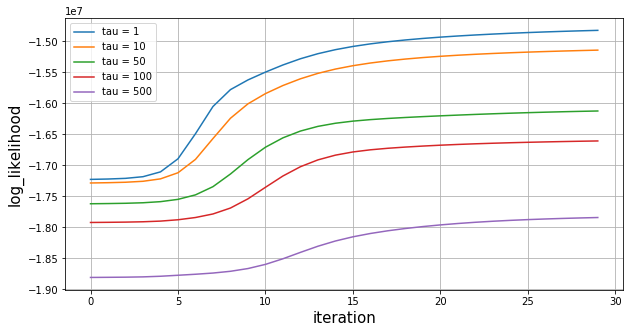

In [81]:
fig, ax = plt.subplots()

fig.set_figwidth(10)
fig.set_figheight(5)


plt.plot(range(30), logs_5_1)
plt.plot(range(30), logs_5_10)
plt.plot(range(30), logs_5_50)
plt.plot(range(30), logs_5_100)
plt.plot(range(30), logs_5_500)
plt.legend(['tau = 1', 'tau = 10', 'tau = 50', 'tau = 100', 'tau = 500'])


plt.grid(True)
plt.ylabel('log_likelihood', fontsize=15)
plt.xlabel('iteration', fontsize=15)
fig.savefig('exp2_5.pdf', bbox_inches='tight')


In [76]:
model_5_100.get_top_words(20)

[['отсталый',
  'законодатель',
  'cyber',
  'cabinet',
  'dpj',
  'дпя',
  'back',
  'legislator',
  'ограниченный',
  'тоня',
  'lawmaker',
  'fishery',
  'illiberal',
  'backward',
  'lagged',
  'ldp',
  'лдп',
  'crunch',
  'ministerial',
  'hatoyama'],
 ['nbsp',
  'chicago',
  'lying',
  'ложь',
  'envy',
  'зависть',
  'слабый',
  'story',
  'невидимый',
  'слепой',
  'заблуждение',
  'deception',
  'speculation',
  'обман',
  'чикагский',
  'leak',
  'спекуляция',
  'delusion',
  'чикаго',
  'lie'],
 ['israel',
  'palestinian',
  'israeli',
  'hamas',
  'settlement',
  'arab',
  'peace',
  'gaza',
  'palestine',
  'палестинский',
  'палестина',
  'jewish',
  'израильский',
  'соглашение',
  'ликвидация',
  'осло',
  'oslo',
  'разрешение',
  'jew',
  'netanyahu'],
 ['вознаграждение',
  'profitability',
  'лицо',
  'компенсация',
  'pay',
  'derivative',
  'клиент',
  'покупатель',
  'payoff',
  'compensation',
  'вкладчик',
  'управляющий',
  'repayment',
  'customer',
  'break'

In [74]:
test_logs = []

model_tmp = TopicModel(num_topics=50)
model_tmp.Theta = new_Theta_5_1
model_tmp.Phi = model_5_1.Phi
test_logs.append(model_tmp.compute_log_likelihood(multilingual_test))

model_tmp.Theta = new_Theta_5_10
model_tmp.Phi = model_5_10.Phi
test_logs.append(model_tmp.compute_log_likelihood(multilingual_test))

model_tmp.Theta = new_Theta_5_50
model_tmp.Phi = model_5_50.Phi
test_logs.append(model_tmp.compute_log_likelihood(multilingual_test))

model_tmp.Theta = new_Theta_5_100
model_tmp.Phi = model_5_100.Phi
test_logs.append(model_tmp.compute_log_likelihood(multilingual_test))

model_tmp.Theta = new_Theta_5_500
model_tmp.Phi = model_5_500.Phi
test_logs.append(model_tmp.compute_log_likelihood(multilingual_test))

In [75]:
test_logs

[-15044356.331078663,
 -15364491.21750275,
 -16257985.256725367,
 -16679871.691273851,
 -17912228.266272068]

In [88]:
for elem in np.array(model_5_1.get_top_words(10)).T:
    print(elem[1], '&', elem[2], '&', elem[3], '&', elem[4], '&', elem[5], '&', elem[6], '\\\ \hline')

страна & energy & израиль & debt & health & european \\ \hline
африка & oil & израильский & eurozone & disease & europe \\ \hline
ребенок & climate & палестинский & greece & people & eu \\ \hline
сельский & carbon & палестинец & bank & research & germany \\ \hline
развитие & price & хамас & crisis & ha & country \\ \hline
население & change & мирный & fiscal & science & union \\ \hline
бедный & emission & арабский & country & life & member \\ \hline
миллион & food & государство & greek & human & state \\ \hline
фермер & world & газ & ecb & world & ha \\ \hline
помощь & gas & египет & government & aid & euro \\ \hline



# 6. 
Построить регуляризованную модель с регуляризатором на основе данных о параллельных документах. Предварительно выведите формулу для производных регуляризатора. Используйте данные только из обу- чающей выборки. Подберите коэффициент регуляризации, основываясь на правдоподобии и метриках AP@n. Визуально оцените качество полученных тем. Сделайте необходимые выводы о применимости та- кого подхода. Попробуйте применить одновременно оба регуляризатора.

In [327]:
reload(topic_model)
from topic_model import TopicModel, KLDocumentPairsRegularizer, KLWordPairsRegularizer

In [328]:
len(multilingual_data) // 2

2476

In [329]:
doc_pairs = dict(zip(range(len(multilingual_data)), 
                     list(range(len(multilingual_data) // 2, len(multilingual_data)))
                     + list(range(len(multilingual_data) // 2))))
for key, value in doc_pairs.items():
    doc_pairs[key] = [value]

In [330]:
kl_doc_reg = KLDocumentPairsRegularizer(100., doc_pairs)

model_6 = TopicModel(num_topics=50, regularizers=[kl_doc_reg])

In [331]:
start_time = timeit.default_timer()
phi, theta, logs = model_6.EM_fit(data=multilingual_train, 
                                trace=True, 
                                vocab=multilingual_vocabulary, 
                                document_names=multilingual_full)
print('time:', timeit.default_timer() - start_time)

[['сша', 'экономический', 'политика', 'проблема', 'world', 'финансовый', 'европейский', 'financial', 'policy', 'китай'], ['china', 'политика', 'проблема', 'economic', 'политический', 'сша', 'финансовый', 'political', 'europe', 'экономика'], ['экономический', 'новый', 'сша', 'economic', 'financial', 'people', 'политика', 'государство', 'рост', 'политический'], ['political', 'сша', 'china', 'world', 'policy', 'economy', 'рынок', 'европа', 'global', 'long'], ['world', 'китай', 'правительство', 'проблема', 'рост', 'economic', 'people', 'большой', 'отношение', 'экономика'], ['сша', 'правительство', 'экономика', 'политический', 'government', 'economy', 'политика', 'china', 'новый', 'уровень'], ['government', 'китай', 'экономика', 'политический', 'европа', 'политика', 'economic', 'policy', 'europe', 'кризис'], ['экономика', 'europe', 'китай', 'финансовый', 'сша', 'political', 'экономический', 'government', 'рост', 'china'], ['правительство', 'новый', 'экономический', 'политика', 'рост', 'сша'

1 time: 23.9216757590184
[['сша', 'экономический', 'политика', 'проблема', 'world', 'финансовый', 'европейский', 'америка', 'financial', 'китай'], ['china', 'политика', 'проблема', 'финансовый', 'политический', 'economic', 'сша', 'political', 'европа', 'экономика'], ['экономический', 'новый', 'сша', 'financial', 'economic', 'государство', 'политика', 'people', 'рост', 'политический'], ['political', 'economy', 'china', 'сша', 'world', 'policy', 'рынок', 'европа', 'global', 'market'], ['world', 'китай', 'правительство', 'проблема', 'рост', 'economic', 'большой', 'отношение', 'people', 'экономика'], ['сша', 'правительство', 'экономика', 'политический', 'политика', 'новый', 'government', 'государство', 'economy', 'уровень'], ['government', 'китай', 'экономика', 'политический', 'европа', 'economic', 'политика', 'europe', 'policy', 'war'], ['экономика', 'финансовый', 'китай', 'экономический', 'сша', 'europe', 'рост', 'political', 'government', 'china'], ['правительство', 'новый', 'политика',

3 time: 22.725251292984467
[['сша', 'экономический', 'политика', 'проблема', 'финансовый', 'америка', 'европейский', 'world', 'международный', 'отношение'], ['china', 'политика', 'финансовый', 'проблема', 'политический', 'европа', 'сша', 'экономика', 'economic', 'political'], ['новый', 'экономический', 'сша', 'государство', 'политика', 'financial', 'политический', 'власть', 'большой', 'многий'], ['economy', 'political', 'policy', 'world', 'china', 'сша', 'европа', 'рынок', 'market', 'global'], ['китай', 'правительство', 'world', 'проблема', 'рост', 'отношение', 'большой', 'экономика', 'сша', 'решение'], ['сша', 'правительство', 'экономика', 'политический', 'государство', 'новый', 'политика', 'кризис', 'рынок', 'уровень'], ['government', 'китай', 'europe', 'экономика', 'economic', 'eu', 'европа', 'policy', 'политический', 'war'], ['экономика', 'финансовый', 'экономический', 'китай', 'рост', 'сша', 'цена', 'большой', 'правительство', 'банк'], ['правительство', 'новый', 'политика', 'эконо

5 time: 22.834705020999536
[['сша', 'проблема', 'политика', 'экономический', 'америка', 'иран', 'финансовый', 'европейский', 'международный', 'мера'], ['европа', 'финансовый', 'проблема', 'доллар', 'германия', 'политика', 'политический', 'цена', 'экономика', 'большой'], ['новый', 'государство', 'экономический', 'сша', 'политический', 'власть', 'большой', 'европа', 'многий', 'сила'], ['economy', 'political', 'market', 'policy', 'европа', 'иран', 'growth', 'япония', 'военный', 'world'], ['китай', 'правительство', 'проблема', 'большой', 'отношение', 'решение', 'рост', 'право', 'система', 'экономика'], ['сша', 'государство', 'экономика', 'политический', 'правительство', 'иран', 'кризис', 'новый', 'рынок', 'израиль'], ['government', 'eu', 'europe', 'policy', 'war', 'economic', 'political', 'international', 'leader', 'time'], ['экономика', 'финансовый', 'цена', 'рост', 'экономический', 'банк', 'китай', 'большой', 'сша', 'случай'], ['правительство', 'новый', 'политика', 'экономический', 'сша'

7 time: 22.691760311019607
[['сша', 'иран', 'проблема', 'америка', 'политика', 'экономический', 'международный', 'мера', 'европейский', 'отношение'], ['германия', 'доллар', 'европа', 'финансовый', 'проблема', 'цена', 'кризис', 'большой', 'политика', 'политический'], ['новый', 'государство', 'власть', 'политический', 'европа', 'экономический', 'многий', 'большой', 'сила', 'демократия'], ['иран', 'военный', 'economy', 'израиль', 'европа', 'япония', 'война', 'euro', 'исламский', 'market'], ['китай', 'правительство', 'проблема', 'право', 'отношение', 'большой', 'решение', 'индия', 'важный', 'сторона'], ['государство', 'иран', 'израиль', 'сша', 'политический', 'ядерный', 'кризис', 'новый', 'экономика', 'правительство'], ['eu', 'government', 'europe', 'political', 'war', 'union', 'international', 'leader', 'policy', 'terrorist'], ['финансовый', 'экономика', 'банк', 'цена', 'рост', 'экономический', 'большой', 'капитал', 'китай', 'валюта'], ['новый', 'правительство', 'политика', 'власть', 'сша

9 time: 22.756315129983705
[['иран', 'сша', 'ядерный', 'проблема', 'оружие', 'америка', 'международный', 'политика', 'соглашение', 'мера'], ['германия', 'доллар', 'европа', 'евро', 'финансовый', 'кризис', 'франция', 'цена', 'союз', 'проблема'], ['государство', 'новый', 'власть', 'политический', 'демократия', 'свобода', 'многий', 'европа', 'сила', 'группа'], ['исламский', 'иран', 'военный', 'израиль', 'война', 'пакистан', 'мусульманский', 'режим', 'саудовский', 'выборы'], ['китай', 'право', 'правительство', 'отношение', 'проблема', 'мусульманин', 'большой', 'индия', 'решение', 'закон'], ['израиль', 'иран', 'государство', 'ядерный', 'политический', 'сша', 'израильский', 'сторона', 'арабский', 'новый'], ['eu', 'government', 'political', 'europe', 'turkey', 'union', 'terrorist', 'war', 'leader', 'international'], ['банк', 'финансовый', 'цена', 'экономика', 'мвф', 'капитал', 'валюта', 'экономический', 'большой', 'рост'], ['правительство', 'новый', 'политика', 'власть', 'политический', 'парт

11 time: 26.035037013993133
[['ядерный', 'иран', 'сша', 'оружие', 'соглашение', 'международный', 'америка', 'проблема', 'безопасность', 'политика'], ['германия', 'европа', 'доллар', 'евро', 'франция', 'кризис', 'союз', 'европейский', 'финансовый', 'еврозона'], ['государство', 'свобода', 'демократия', 'власть', 'новый', 'политический', 'женщина', 'многий', 'группа', 'закон'], ['исламский', 'иран', 'пакистан', 'саудовский', 'мусульманский', 'режим', 'военный', 'аравия', 'война', 'запад'], ['право', 'правительство', 'мусульманин', 'закон', 'отношение', 'суд', 'китай', 'проблема', 'общество', 'история'], ['израиль', 'государство', 'иран', 'ядерный', 'арабский', 'израильский', 'сторона', 'ближний', 'политический', 'восток'], ['eu', 'turkey', 'political', 'government', 'union', 'europe', 'treaty', 'terrorist', 'ukraine', 'drug'], ['банк', 'финансовый', 'цена', 'экономика', 'капитал', 'мвф', 'валюта', 'курс', 'большой', 'экономический'], ['правительство', 'новый', 'партия', 'власть', 'политик

13 time: 27.337836327031255


KeyboardInterrupt: 

In [176]:
#with open('2_exp_6_logs_phi_theta_n_wt_n_td.pickle', 'wb') as f:
    #tmp = (logs, model_6.Phi, model_6.Theta, model_6._nwt, model_6._ntd)
    #pickle.dump(tmp, f)

#######read 

with open('2_exp_6_logs_phi_theta_n_wt_n_td.pickle', 'rb') as f:
    logs_6, model_6.Phi, model_6.Theta, model_6._nwt, model_6._ntd = pickle.load(f)



In [177]:
model_6.document_names = multilingual_full
model_6.vocab=multilingual_vocabulary

In [178]:
multilingual_full[0]

'$10,000 Gold? SAN FRANCISCO – It has never been easy to have a rational conversation about the value of gold. Lately, with gold prices up more than 300% over the last decade, it is harder than ever. Just last December, fellow economists Martin Feldstein and Nouriel Roubini each penned op-eds bravely questioning bullish market sentiment, sensibly pointing out gold’s risks. Wouldn’t you know it? Since their articles appeared, the price of gold has moved up still further. Gold prices even hit a record-high $1,300 recently. Last December, many gold bugs were arguing that the price was inevitably headed for $2,000. Now, emboldened by continuing appreciation, some are suggesting that gold could be headed even higher than that. One successful gold investor recently explained to me that stock prices languished for a more than a decade before the Dow Jones index crossed the 1,000 mark in the early 1980’s. Since then, the index has climbed above 10,000. Now that gold has crossed the magic $1,00

In [167]:
top_words_6 = model_6.get_top_words(10)
top_words_6[0:5]

[['iran',
  'iranian',
  'nuclear',
  'sanction',
  'program',
  'regime',
  'ahmadinejad',
  'khamenei',
  'uranium',
  'enrichment',
  'economic',
  'diplomatic',
  'deal',
  'ayatollah',
  'west',
  'ha',
  'regional',
  'revolutionary',
  'supreme',
  'islamic',
  'leader',
  'israel',
  'council',
  'republic',
  'negotiation',
  'united',
  'security',
  'international',
  'ambition',
  'foreign',
  'agreement',
  'mahmoud',
  'tehran',
  'ahmedinejad',
  'modi',
  'ali',
  'doe',
  'option',
  'rouhani',
  'confrontation',
  'effort',
  'guard',
  'diplomacy',
  'strike',
  'stop',
  'offer',
  'american',
  'compromise',
  'face',
  'khatami',
  'rowhani',
  'bomb',
  'fuel',
  'isolation',
  'facility',
  'action',
  'khomeini',
  'domestic',
  'npt',
  'non',
  'accept',
  'talk',
  'middle',
  'bjp',
  'force',
  'develop',
  'enriched',
  'activity',
  'irgc',
  'outcome',
  'mousavi',
  'leadership',
  'president',
  'relation',
  'guarantee',
  'tension',
  'neighbor',
  

In [168]:
top_docs_6 = model_6.get_top_docs(5)

In [169]:
top_docs_6[0]

['Adapting to Climate Change COPENHAGEN – Striking the right balance between preventing global warming and adapting to its effects is one of the most important – and most vexing – policy questions of our age. It is also often ignored. According to the conventional wisdom of many environmental campaigners, we should first do everything we can to mitigate global warming, and only then focus on adaptation strategies. This seems wrong – even immoral – if we could do more for people and the planet through adaptation. Moreover, it is inconsistent with the inescapable fact that, whatever we do, we cannot prevent all of global warming’s effects. If we are ill-prepared, global warming will cause more deaths and devastation, especially in poor countries and fragile societies. Adaptation would also mean saving many lives from catastrophes not related to global warming. If we prepare societies for more ferocious hurricanes in the future, for example, we are also helping them to cope better with to

In [151]:
model_6.Theta

array([[  3.69624414e-15,   6.68731991e-13,   1.04767136e-08, ...,
          0.00000000e+00,   1.54719512e-49,   0.00000000e+00],
       [  1.11395783e-58,   2.62147416e-33,   7.55077049e-49, ...,
          1.39603555e-02,   1.01174120e-08,   2.21377924e-01],
       [  2.38220642e-68,   2.26632672e-76,   1.55521264e-63, ...,
          2.48046480e-01,   1.52953400e-03,   2.44083432e-04],
       ..., 
       [  2.49126075e-97,   1.08794321e-72,   2.66744414e-67, ...,
          2.21114350e-06,   1.20445581e-02,   7.11367994e-07],
       [  3.45195222e-40,   2.21828485e-36,   1.79517956e-34, ...,
          2.63189435e-11,   9.45030154e-03,   1.10776583e-13],
       [  1.05922866e-02,   1.53373893e-02,   3.69616106e-02, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [ ]:
def apan(n=1, theta, document_pairs):
    docs = np.array(list(document_pairs.keys()))
    parallel = np.array(list(document_pairs.values())).ravel()
    
    theta[docs]